# Problem Statement and Objective:

we are given with a dataset of car price prediction.our objective is to find insights from this dataset and build a model which can predict car price accurately.

Which variables are significant in predicting the price of a car

How well those variables describe the price of a car

# Solution:

The solution is divided into the following sections:

Data understanding

Data cleaning

Data preparation

Model building and evaluation

# Data understanding:

In [1]:
#importing necessary libraries to read the data and understand the data

!pip install plotly

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.metrics import classification_report

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint



In [2]:
#reading the dataset
cp=pd.read_csv("D:\MyData\Desktop\car.csv")

In [3]:
#reading the top 5 rows
cp.head()

,sl.no,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#reading the last 5 rows
cp.tail()

,sl.no,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [5]:
#checking the total columns and rows
cp.shape

(6019, 14)

# Data Wrangling

In [6]:
cp.describe()

,sl.no,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sl.no              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


here we are seeing that a major part of New_price features is null,that's why we can safely delete this features.


In [8]:
cp.dtypes

sl.no                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

The object type is that , 
the data is in categorical form we shall convert it to numerical form

In [9]:
cp.isnull().sum()

sl.no                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

From above we can see that there are null values in some of the columns we shall fill those while  data cleaning


The column“Price” is the target variable and rest of the columns are independent variables.

The independent variables are again divided into Categorical and Numerical variables.

Numerical variables: [ Year,Kilometers_Driven]

Categorical variables: [Fuel_Type,Transmission,Owner_Type]

There are also some others features but before doing the analysisa we have to clean those.

# Data cleaning and feature engineering

In [10]:
cp= cp.drop(['New_Price','sl.no'],axis = 1)#droping the new price and unnamed columns

In [11]:
cp.dropna(axis = 0, inplace=True)

In [12]:
cp['Engine'] = cp['Engine'].str.split().str[0]
cp['Power'] = cp['Power'].str.split().str[0]
cp['Name'] = cp['Name'].str.split().str[0]

In [13]:
#Let's convert km/kg tito kmpl because most of the data point are kmpl
Correct_Mileage = []

for i in cp.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
        
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))

In [14]:
cp['Mileage'] = Correct_Mileage

In [15]:
#Let's clear 'null' values from our dataset if any present
cp[pd.to_numeric(cp.Power, errors = 'coerce').isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford,Jaipur,2008,111111,Diesel,Manual,First,17.0,1399,null,5.0,2.00
79,Hyundai,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,1.30
89,Hyundai,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.0,2.10
120,Hyundai,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null,5.0,0.85
143,Hyundai,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai,Chennai,2007,79000,Petrol,Manual,First,17.0,1086,null,5.0,1.85
5873,Hyundai,Pune,2006,47200,Petrol,Manual,Second,17.0,1086,null,5.0,1.20
5925,Skoda,Pune,2010,85000,Petrol,Manual,First,17.0,1798,null,5.0,2.85
5943,Mahindra,Chennai,2002,75000,Diesel,Manual,First,0.0,2112,null,6.0,1.70


In [16]:
cp =cp[cp.Power != 'null']

In [17]:
cp.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.60,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.00,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.70,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968,140.8,5.0,17.74


D:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

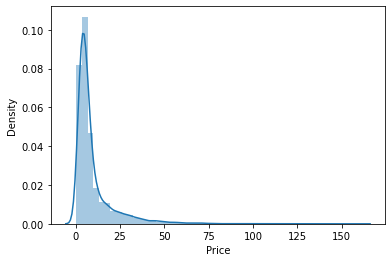

In [18]:
#First have the Price distribution
sns.distplot(cp['Price'])

Text(0.5, 1.0, 'Most frequent Company')

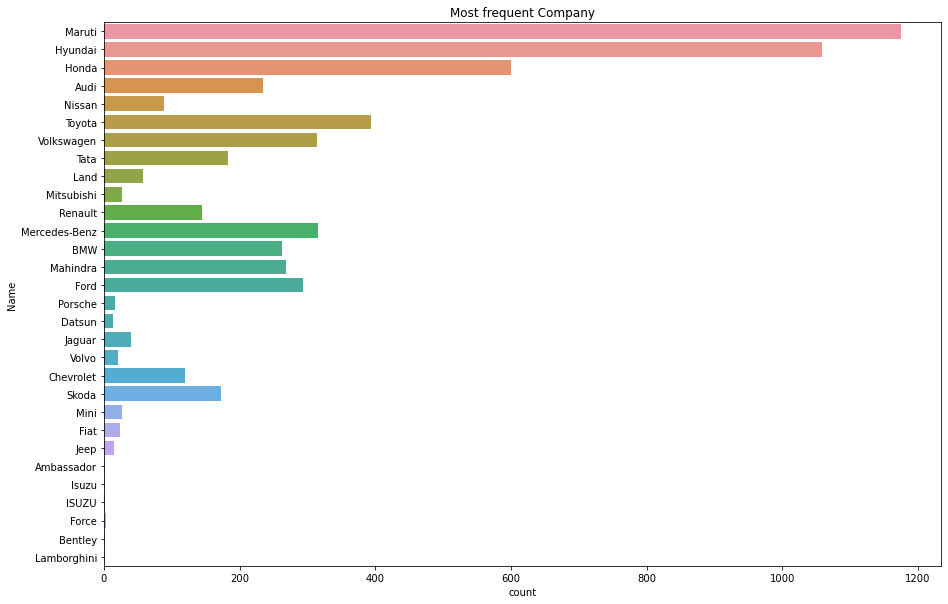

In [19]:
#Let's have the Company frequency
plt.figure(figsize = [15,10])
sns.countplot(y =  'Name',data = cp)
plt.title("Most frequent Company")

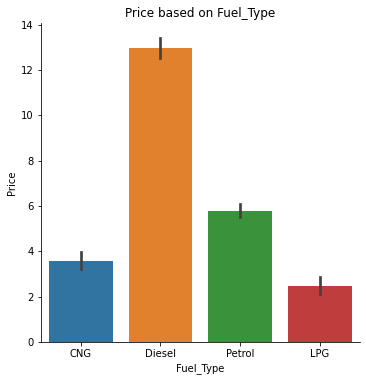

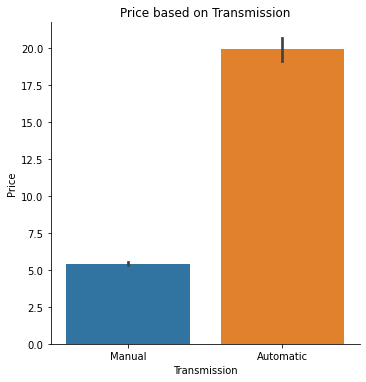

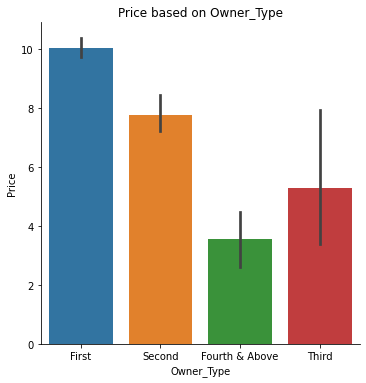

In [20]:
#First let's see how our target variable is dependent on  individual Categorical features

features = cp[['Fuel_Type','Transmission','Owner_Type']].columns
for i in features:
    sns.catplot(x = i , y = 'Price',kind = 'bar',data = cp)
    plt.title("Price based on " + i)
    plt.show()

Text(0.5, 1.0, 'Counting transamission based on owner type')

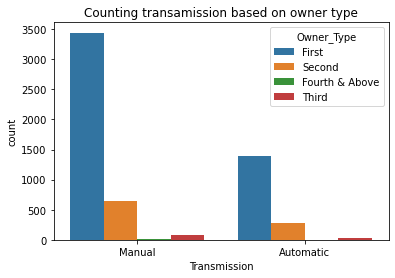

In [21]:
# relationship pairwise
sns.countplot(x = 'Transmission', hue ='Owner_Type', data = cp )
plt.title('Counting transamission based on owner type')

Text(0.5, 1.0, 'Counting transamission based on Fuel type')

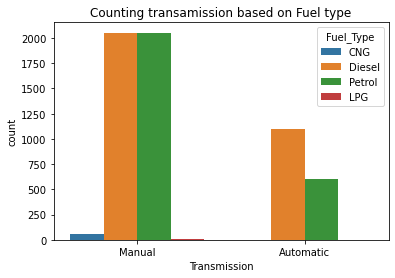

In [22]:
sns.countplot(x = 'Transmission', hue ='Fuel_Type', data = cp )
plt.title('Counting transamission based on Fuel type')

Text(0.5, 1.0, 'kilometer driven')

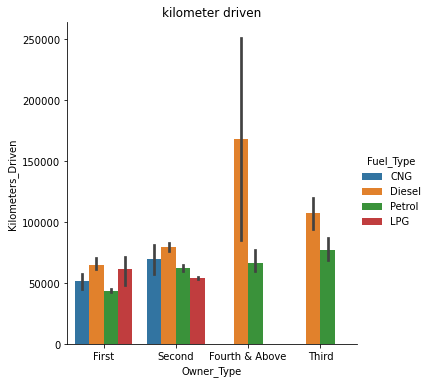

In [23]:
#Let's have the relationship between kilometer driven and Owner type
sns.catplot(x = 'Owner_Type', y = 'Kilometers_Driven',hue = 'Fuel_Type',kind = 'bar', data = cp)
plt.title('kilometer driven')

Text(0.5, 1.0, 'Price by year and Location')

<Figure size 1080x1080 with 0 Axes>

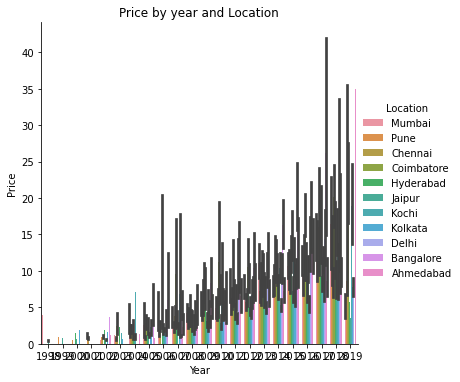

In [24]:
plt.figure(figsize = [15,15])
sns.catplot(y = 'Price', x = 'Year',hue = 'Location',kind = 'bar', data = cp)
plt.title('Price by year and Location')

In [131]:
col=["Fuel_Type","Transmission","Owner_Type","Name","Location","Engine","Power"]

In [132]:
from sklearn.preprocessing import LabelEncoder # converting labeled data 
le=LabelEncoder()
for features in col:
    cp[features]=le.fit_transform(cp[features].astype(str))
print(cp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   int32  
 1   Location           5872 non-null   int32  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   int32  
 4   Transmission       5872 non-null   int32  
 5   Owner_Type         5872 non-null   int32  
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   int32  
 8   Power              5872 non-null   int32  
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
 11  No_Year            5872 non-null   int64  
dtypes: float64(3), int32(7), int64(2)
memory usage: 595.8 KB
None


In [25]:
#Let's have a new featuresa from Year columns.
cp['Current_Year'] = 2021
cp['No_Year'] = cp['Current_Year'] - cp['Year']

In [26]:
cp.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Current_Year,No_Year
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75,2021,11
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.60,1582,126.2,5.0,12.50,2021,6
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.00,1199,88.7,5.0,4.50,2021,10
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.70,1248,88.76,7.0,6.00,2021,9
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968,140.8,5.0,17.74,2021,8


we don't need current_year and year now so we can drop it

In [27]:
cp = cp.drop(['Year','Current_Year'],axis = 1)

In [31]:
#finding the correlation of the data
corr=cp.corr()
corr.style.background_gradient(cmap='coolwarm')

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,No_Year
Name,1.000000,0.027359,0.027295,-0.058939,0.171065,-0.026750,-0.010076,0.187048,-0.138097,-0.012838
Location,0.027359,1.000000,-0.045368,0.115747,0.043287,-0.038245,0.025254,-0.038658,-0.118238,0.016867
Kilometers_Driven,0.027295,-0.045368,1.000000,-0.104494,0.024111,0.076528,-0.056761,0.083072,-0.008249,0.169369
Fuel_Type,-0.058939,0.115747,-0.104494,1.000000,0.119206,0.039229,-0.182010,-0.297182,-0.301626,0.113159
Transmission,0.171065,0.043287,0.024111,0.119206,1.000000,-0.002291,0.350808,0.074554,-0.585623,0.085406
Owner_Type,-0.026750,-0.038245,0.076528,0.039229,-0.002291,1.000000,-0.137885,0.003977,-0.088584,0.377254
Mileage,-0.010076,0.025254,-0.056761,-0.182010,0.350808,-0.137885,1.000000,-0.313466,-0.323251,-0.273326
Seats,0.187048,-0.038658,0.083072,-0.297182,0.074554,0.003977,-0.313466,1.000000,0.055547,-0.007833
Price,-0.138097,-0.118238,-0.008249,-0.301626,-0.585623,-0.088584,-0.323251,0.055547,1.000000,-0.299475
No_Year,-0.012838,0.016867,0.169369,0.113159,0.085406,0.377254,-0.273326,-0.007833,-0.299475,1.000000


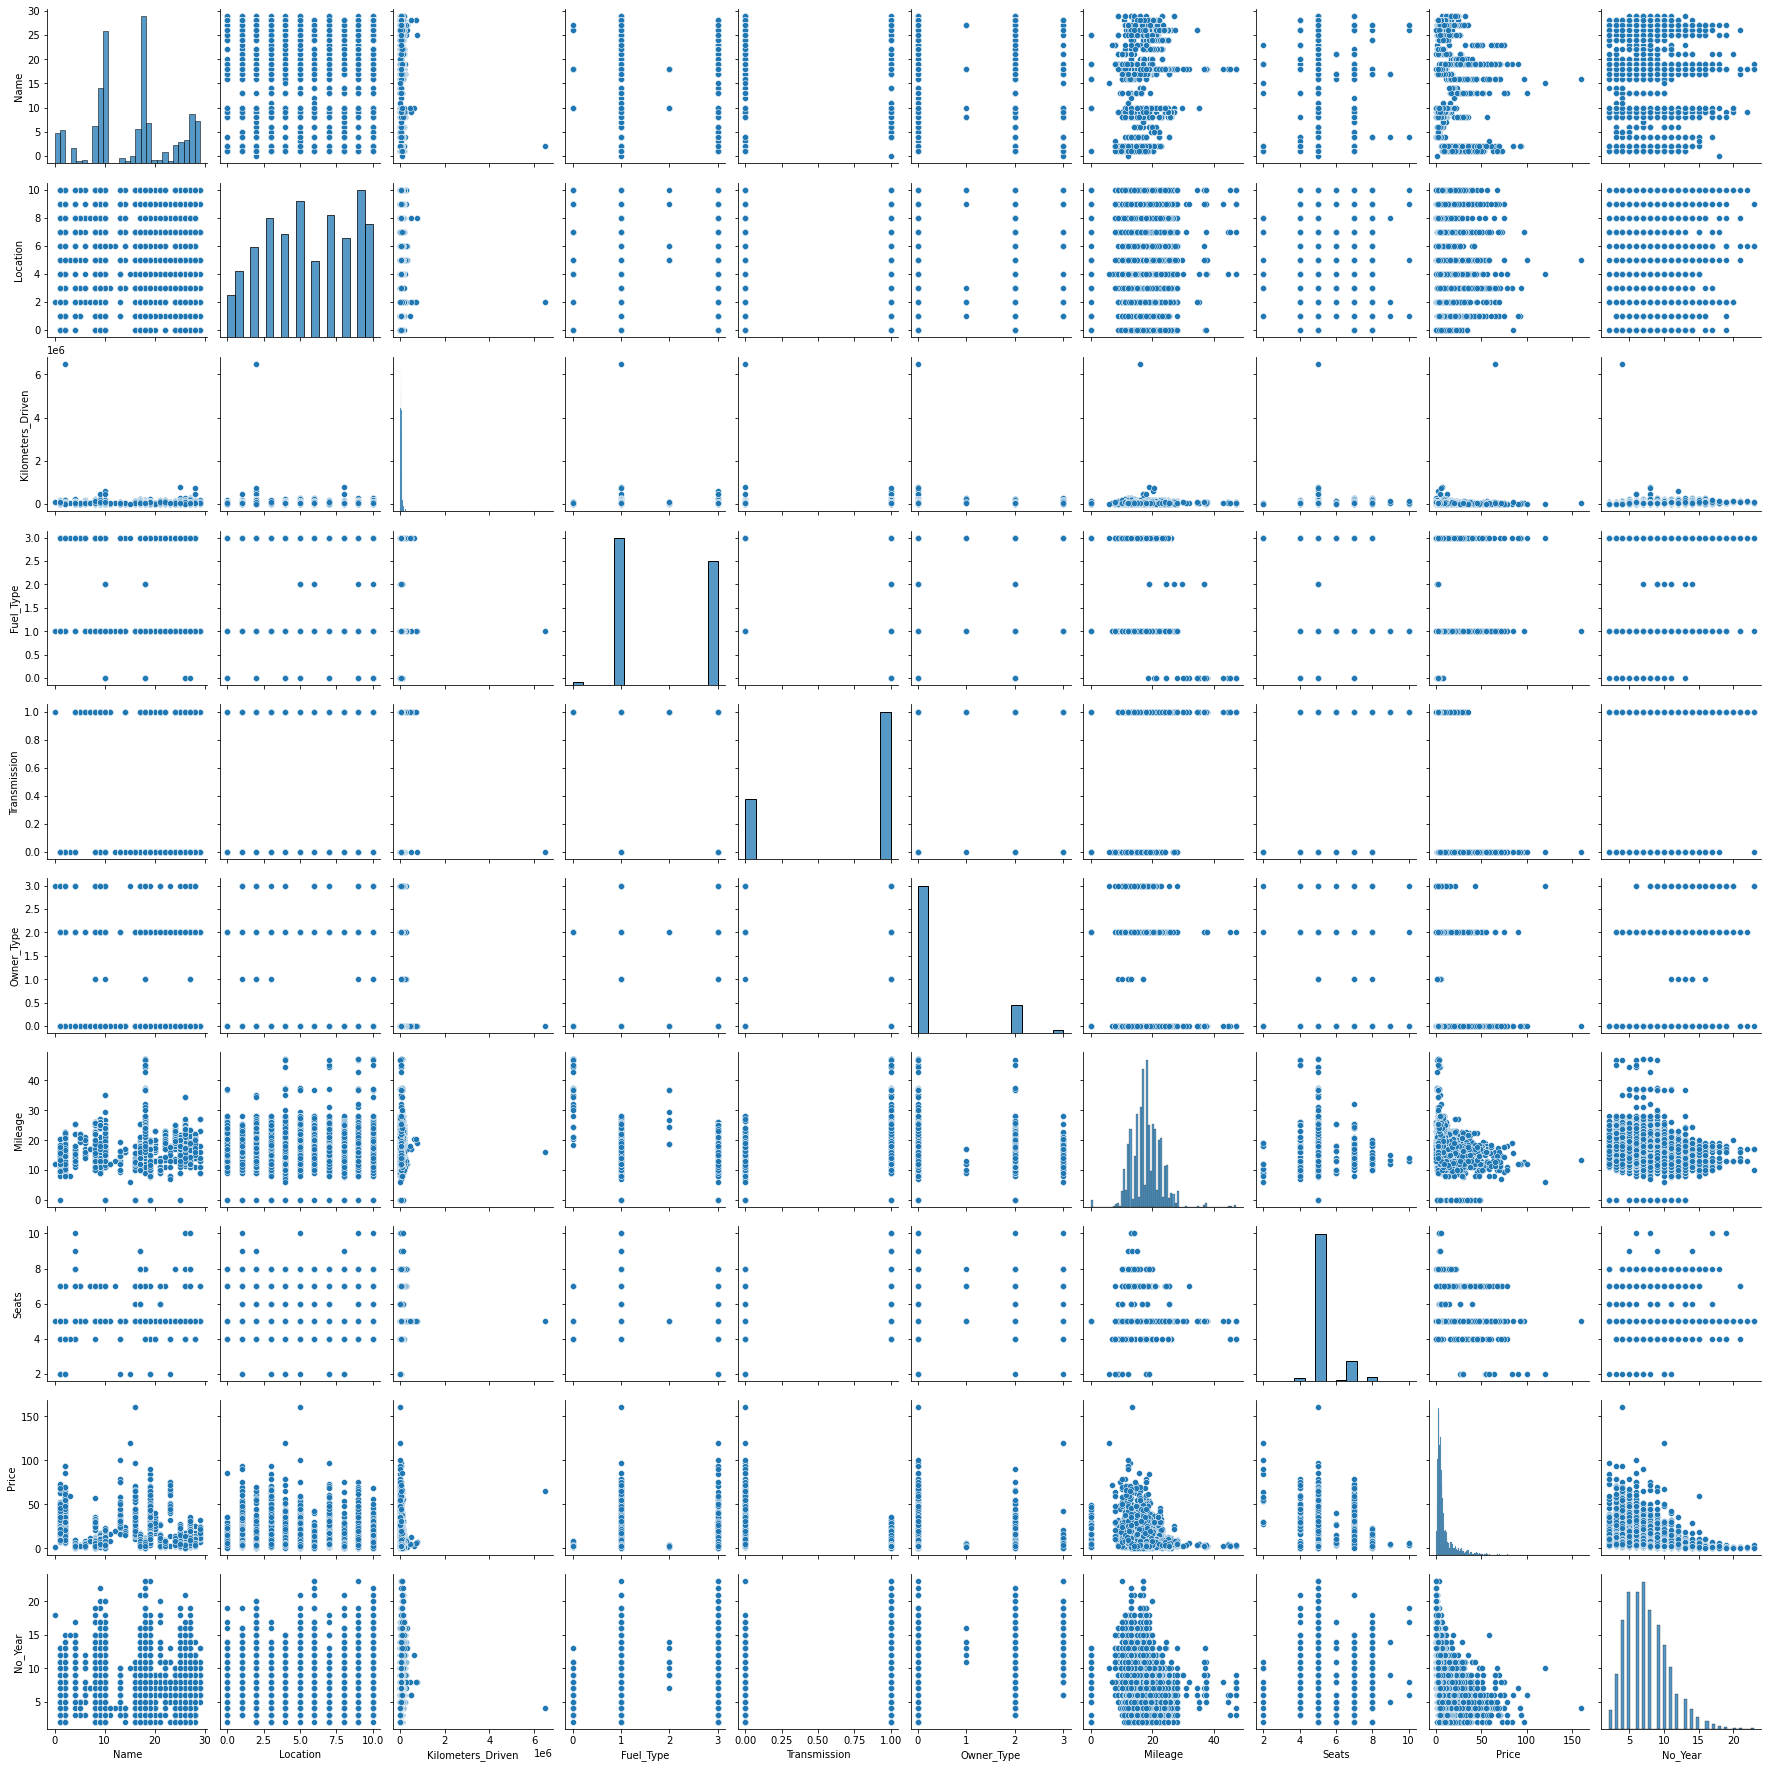

In [32]:
sns.pairplot(cp)

# Principal Component Analysis for data visualization

In [33]:
X_raw = cp.drop(['Price'], axis = 1, inplace = False)
y = cp['Price']

In [34]:
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [35]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, cp[['Price']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


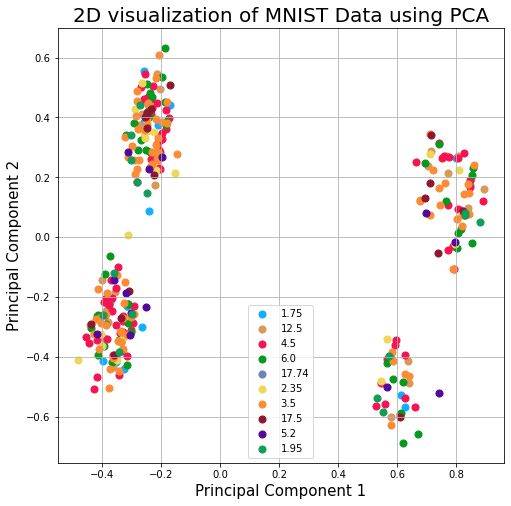

In [36]:
import random

fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(cp['Price'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['Price'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()

# Algoithms Performed below
Regression Algorithm
1)KNN Regressor 2)Linear Regressor 3)Decision Tree Regressor 4)Random Forest Regressor
5)Support Vector Regressor 6)XG Boost Regressor

In [37]:
X=cp.iloc[:,1:]
X.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_Year
0,9,72000,0,1,0,37.24,998,58.16,5.0,1.75,11
1,10,41000,1,1,0,19.60,1582,126.2,5.0,12.50,6
2,2,46000,3,1,0,18.00,1199,88.7,5.0,4.50,10
3,2,87000,1,1,0,20.70,1248,88.76,7.0,6.00,9
4,3,40670,1,0,2,15.00,1968,140.8,5.0,17.74,8


In [41]:
y=cp.iloc[:,-2]
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [42]:
print(X.shape,y.shape)

(5872, 11) (5872,)


# TRAIN-TEST SPLIT

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)
print(X_train.shape)
print(X_test.shape)

(4697, 11)
(1175, 11)


# KNN Regressor Algorithm Implementation

In [44]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()

In [45]:
knnreg = KNR.fit(X_train, y_train)

In [46]:
predictions = knnreg.predict(X_test)

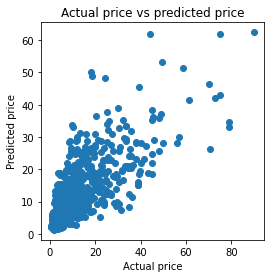

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_test,predictions)
plt.title("Actual price vs predicted price")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [48]:
#checking the errors and r2 error
MAE_KNN= mean_absolute_error(y_test, predictions)
MSE_KNN= mean_squared_error(y_test, predictions)
R2_KNN = r2_score(y_test, predictions)

print("THe MAE of the KNN_regression is:", MAE_KNN)
print("THe MSE of the KNN_regression is:", MSE_KNN)
print("THe R^2 of the KNN_regression is:", R2_KNN)


THe MAE of the KNN_regression is: 3.9374774468085105
THe MSE of the KNN_regression is: 44.772949542127655
THe R^2 of the KNN_regression is: 0.6119048478087286


In [49]:
df_table = pd.DataFrame(columns=["Model","Mean Absolute Error","Mean Squared Error","R Squared Error"])

dict1 = {
"Model" : "KNN_REGRESSOR",
"Mean Absolute Error" : mean_absolute_error(y_test, predictions),
"Mean Squared Error" :mean_squared_error(y_test, predictions),
"R Squared Error" : r2_score(y_test, predictions),
}
df_table = df_table.append(dict1,ignore_index = True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,3.937477,44.77295,0.611905


In [50]:
#Let's find perfect k value.
Error = []

for i in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Error.append(mean_squared_error(y_test,y_pred))

Text(0, 0.5, 'Error Rate')

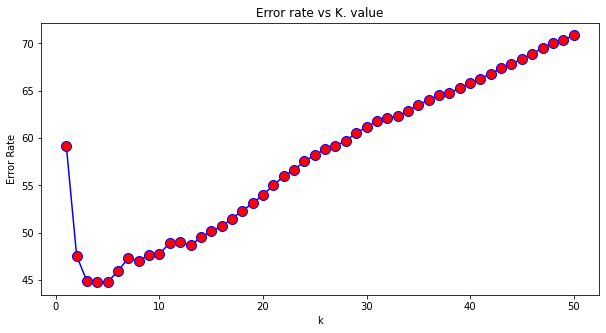

In [51]:
plt.figure(figsize=(10,5))
plt.plot(range(1,51), Error, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error rate vs K. value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [52]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [53]:
print('Mean Squared Error is', mean_squared_error(y_test, y_pred))

Mean Squared Error is 47.75061514042553


# Linear Regression Algorithm

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred = lr.predict(X_test)

In [108]:
lr.score(X_test,y_test)

1.0

In [109]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print('Mean Squared Error on test data: ', + mse)

Mean Squared Error on test data:  4.273167934942894e-26


In [110]:
#Putting together the coefficients and their corresponding variable name
lr_coef = pd.DataFrame()
lr_coef['Columns'] = X_train.columns
lr_coef['Coefficient'] = pd.Series(lr.coef_)
print(lr_coef)

              Columns   Coefficient
0            Location  3.867588e-16
1   Kilometers_Driven -5.229448e-18
2           Fuel_Type -2.273239e-16
3        Transmission  1.405290e-14
4          Owner_Type -6.972852e-16
5             Mileage -4.059993e-16
6              Engine  2.409811e-19
7               Power -7.714375e-17
8               Seats  7.302725e-17
9               Price  1.000000e+00
10            No_Year -1.725113e-16


In [111]:
#Import ridge regression from sklearn.
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train,y_train)
y_pred = ridgeR.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error on test data: ', + mse)

Mean Squared Error on test data:  9.888450774037271e-10


In [112]:
#Import ridge regression from sklearn.
from sklearn.linear_model import Lasso

LassoR = Lasso(alpha = 1)
LassoR.fit(X_train,y_train)
y_pred = LassoR.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error on test data: ', + mse)

Mean Squared Error on test data:  0.01222978242014414


In [115]:
dict2= {"Model" : "LINEAR_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, y_pred),
"Mean Squared Error":mean_squared_error(y_test, y_pred),
"R Squared Error" : r2_score(y_test, y_pred)
}
df_table = df_table.append(dict2,ignore_index=True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,3.937477,44.772950,0.611905
1,DECISION_TREE_REGRESSOR,0.020672,0.088235,0.999235
2,RANDOM_FOREST_REGRESSOR,0.024820,0.162940,0.998588
3,LINEAR_REGRESSOR,0.065889,0.012230,0.999894


# Decision tree

In [116]:
from sklearn.tree import DecisionTreeRegressor#Decision tree
decmodel=DecisionTreeRegressor()
decmodel.fit(X_train,y_train)
decpred=decmodel.predict(X_test)

In [117]:
predictions_3=decmodel.predict(X_test)

In [118]:
MAE_DTR = mean_absolute_error(y_test, predictions_3)
MSE_DTR = mean_squared_error(y_test, predictions_3)
R2_DTR = r2_score(y_test, predictions_3)
print("THe MAE of the Decision_Tree is:", MAE_DTR)
print("THe MSE of the Decision_Tree is:", MSE_DTR)
print("THe R^2 of the Decision_Tree is:", R2_DTR)

THe MAE of the Decision_Tree is: 0.02792340425531938
THe MSE of the Decision_Tree is: 0.1228908085106383
THe R^2 of the Decision_Tree is: 0.9989347736184553


In [119]:
dict4= {"Model" : "DECISION_TREE_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, predictions_3),
"Mean Squared Error":mean_squared_error(y_test, predictions_3),
"R Squared Error" : r2_score(y_test, predictions_3)
}
df_table = df_table.append(dict4,ignore_index=True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,3.937477,44.772950,0.611905
1,DECISION_TREE_REGRESSOR,0.020672,0.088235,0.999235
2,RANDOM_FOREST_REGRESSOR,0.024820,0.162940,0.998588
3,LINEAR_REGRESSOR,0.065889,0.012230,0.999894
4,DECISION_TREE_REGRESSOR,0.027923,0.122891,0.998935


# Random Forest 

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params_to_test = {
    'n_estimators':range(1,11)
}

rf_model=RandomForestRegressor()

In [121]:
grid_search=GridSearchCV(rf_model, param_grid=params_to_test)

grid_search.fit(X_train,np.array(y_train).ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': range(1, 11)})

In [122]:
predictions_4=grid_search.predict(X_test)

In [123]:
MAE_RF = mean_absolute_error(y_test, predictions_4)
MSE_RF = mean_squared_error(y_test, predictions_4)
R2_RF = r2_score(y_test, predictions_4)
print("THe MAE of the Random_forest is:",MAE_RF)
print("THe MSE of the Random_forest is:", MSE_RF)
print("THe R^2 of the Random_forest is:", R2_RF)


THe MAE of the Random_forest is: 0.03582978723404267
THe MSE of the Random_forest is: 0.1399513191489361
THe R^2 of the Random_forest is: 0.9987868918831588


In [124]:
dict5= {"Model" : "RANDOM_FOREST_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, predictions_4),
"Mean Squared Error":mean_squared_error(y_test, predictions_4),
"R Squared Error" : r2_score(y_test, predictions_4)
}
df_table = df_table.append(dict5,ignore_index=True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,3.937477,44.772950,0.611905
1,DECISION_TREE_REGRESSOR,0.020672,0.088235,0.999235
2,RANDOM_FOREST_REGRESSOR,0.024820,0.162940,0.998588
3,LINEAR_REGRESSOR,0.065889,0.012230,0.999894
4,DECISION_TREE_REGRESSOR,0.027923,0.122891,0.998935
5,RANDOM_FOREST_REGRESSOR,0.035830,0.139951,0.998787
